In [1]:
!pip install cupy-cuda112




In [2]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt


ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

Original error:
  ImportError: libcudart.so.11.0: cannot open shared object file: No such file or directory
================================================================


In [3]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = cp.random.randn(input_size, hidden_size) * 0.01
        self.b1 = cp.zeros((1, hidden_size))
        self.W2 = cp.random.randn(hidden_size, output_size) * 0.01
        self.b2 = cp.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + cp.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward(self, X):
        self.Z1 = cp.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = cp.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dA2 = output - y
        dZ2 = dA2 * self.sigmoid_derivative(self.Z2)
        dW2 = cp.dot(self.A1.T, dZ2) / m
        db2 = cp.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = cp.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.Z1)
        dW1 = cp.dot(X.T, dZ1) / m
        db1 = cp.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= 0.01 * dW1
        self.b1 -= 0.01 * db1
        self.W2 -= 0.01 * dW2
        self.b2 -= 0.01 * db2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = cp.mean(cp.square(output - y))
            self.backward(X, y, output)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss.get()}")


Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 0.6982 - accuracy: 0.4570
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5830
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5810
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.5580
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.5650
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.5980
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6190
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6430
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.6630
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.6740
Loss: 0.59685742855

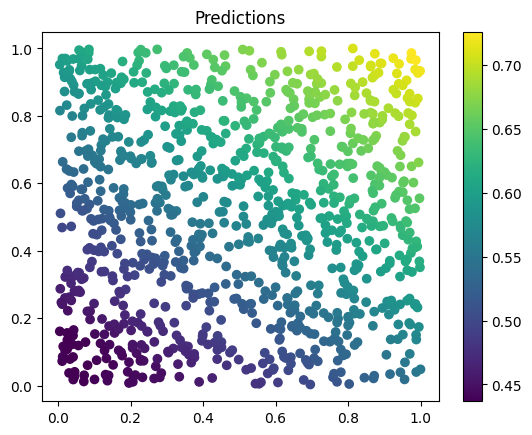

In [5]:
import numpy as np  # Import numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 2)
y = np.array([[1 if (x1 + x2) > 1 else 0 for x1, x2 in X]]).T

# Define a simple neural network model
model = Sequential([
    Dense(5, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(X)

# Display predictions (optional)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.colorbar()
plt.title('Predictions')
plt.show()
